In [1]:
import pandas as pd
import matplotlib.pyplot as plt

FL_filepath = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2025-10-29_11-25-06/MARE_stats.csv'

def plot(file, learning_type):
    df = pd.read_csv(file)
    plt.figure(figsize=(10, 5))
    plt.bar(df['dataset'], df['mean'], color=['#1f77b4' if 'fl' in d else '#ff7f0e' for d in df['dataset']])
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

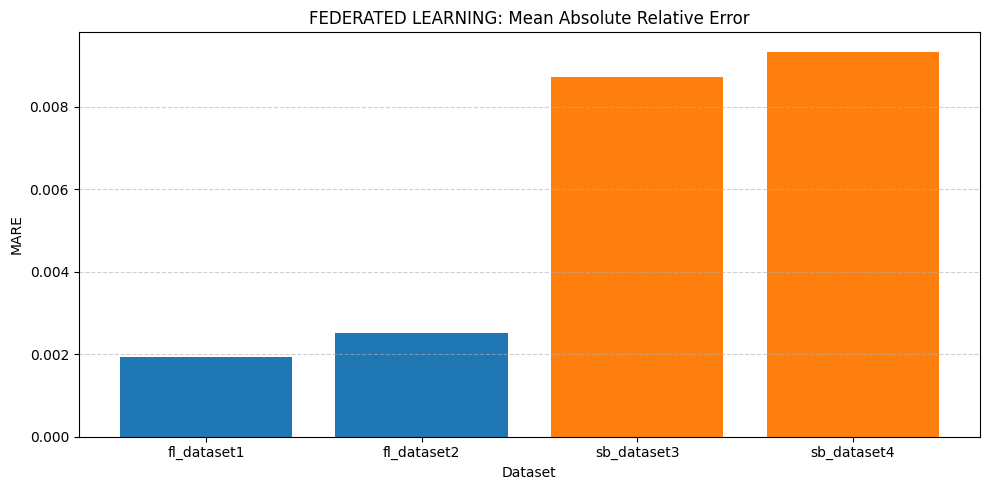

In [2]:
plot(FL_filepath, 'FEDERATED')

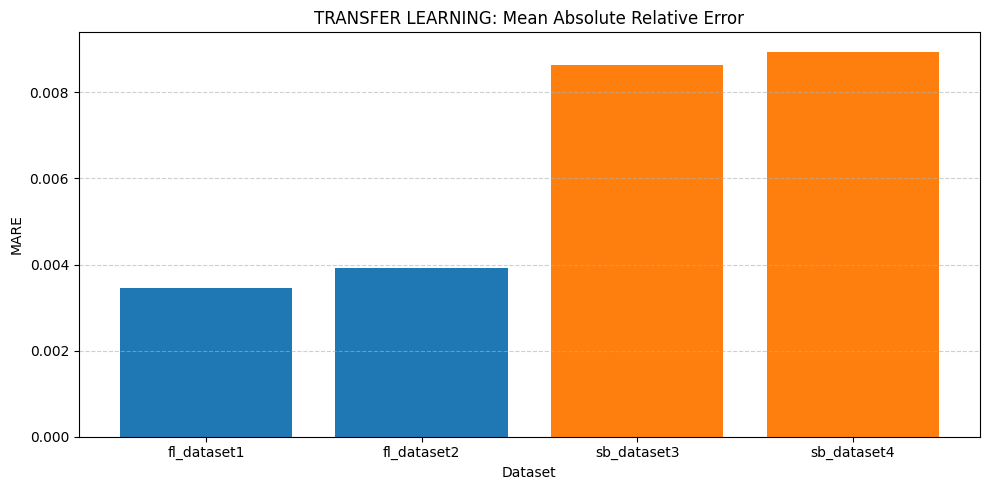

In [3]:
TL_filepath = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-10-29_11-31-47/MARE_stats.csv'
plot(TL_filepath, 'TRANSFER')

In [4]:
CT_filepath = '/Users/ramanzatsarenko/smores_proj/out/crossval_SB_FL_100epochs_1runs_2025-10-29_12-53-19/MARE_stats.csv'
TL_filepath = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-10-29_11-31-47/MARE_stats.csv'
import numpy as np

def plot(file1, file2, learning_type, model):
    df = pd.read_csv(file1)
    df = df.loc[df['model'] == model]
    df2 = pd.read_csv(file2)
    df2 = df2[df2['dataset'].isin(['fl_dataset1', 'fl_dataset2'])]
    # x = np.arange(len(df['dataset']))
    width = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(df['dataset'], df['mean'], color='#1f77b4')
    plt.bar(['florida_dataset1', 'florida_dataset2'], df2['mean'], color="#ff7700ff")
    plt.title(f'{learning_type}, {model}: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

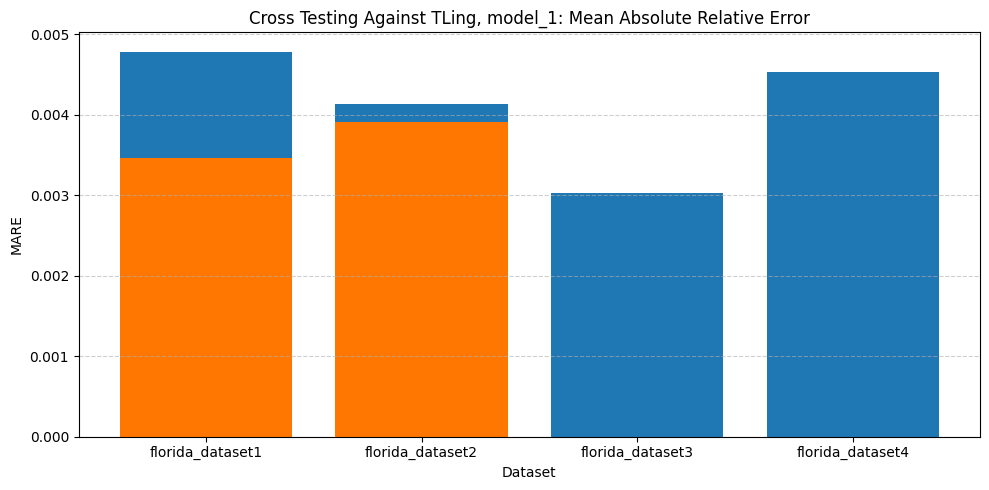

In [5]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_1')

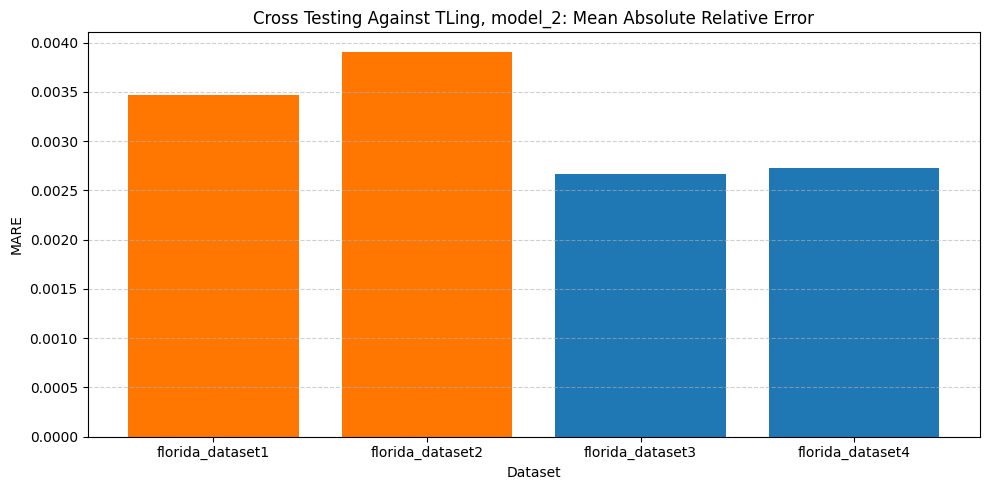

In [6]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_2')

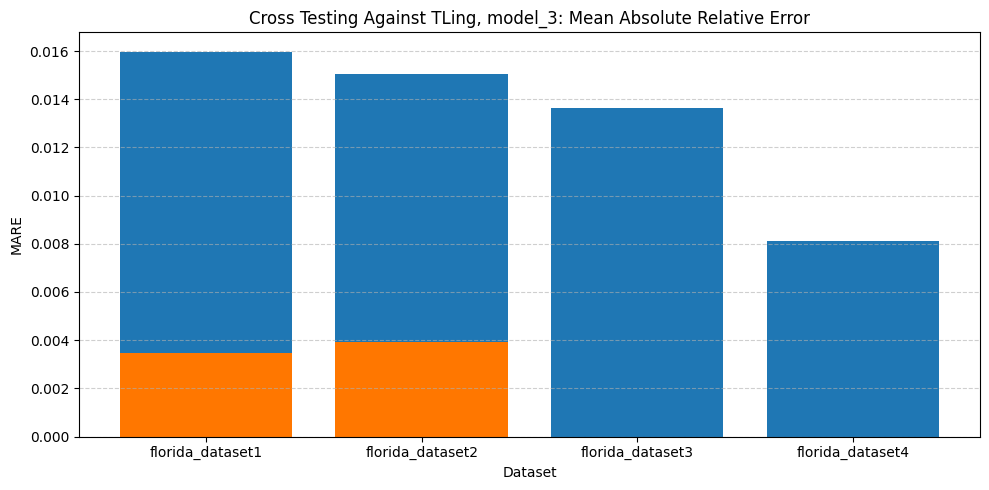

In [7]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_3')

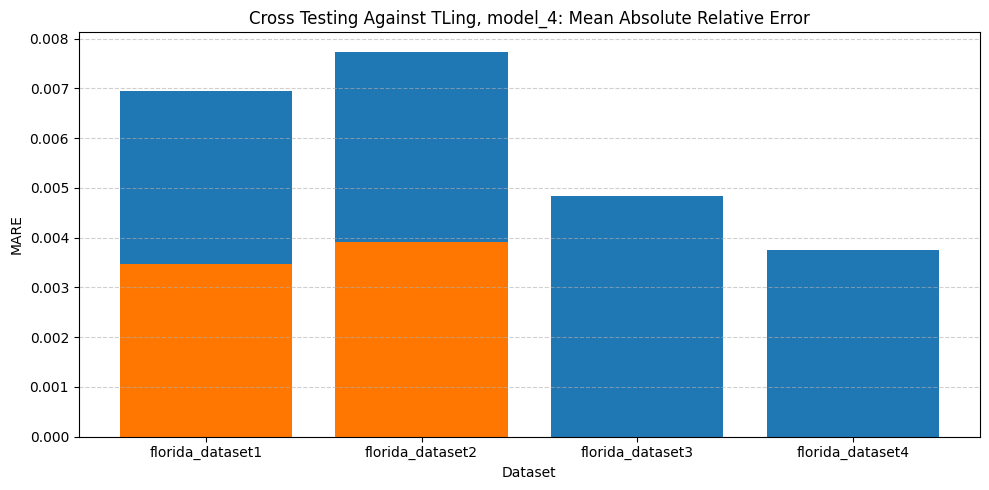

In [8]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_4')

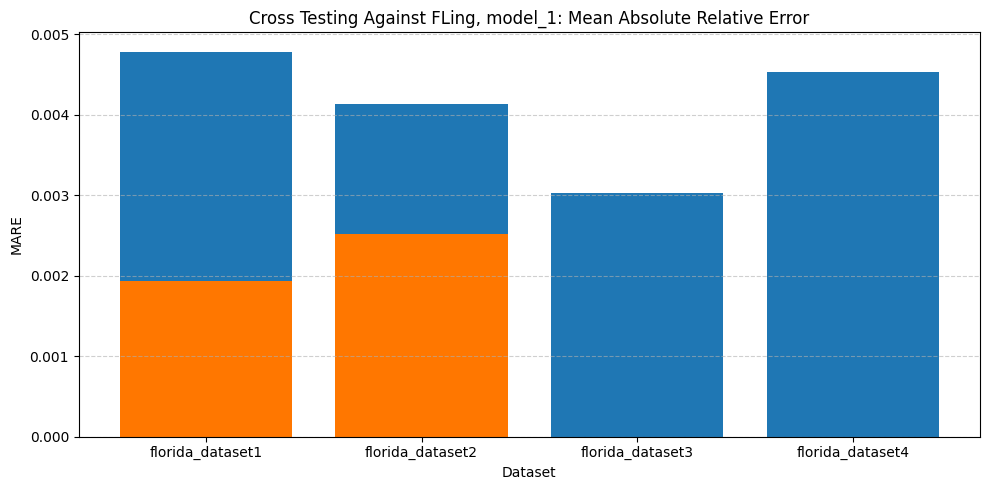

In [9]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_1')

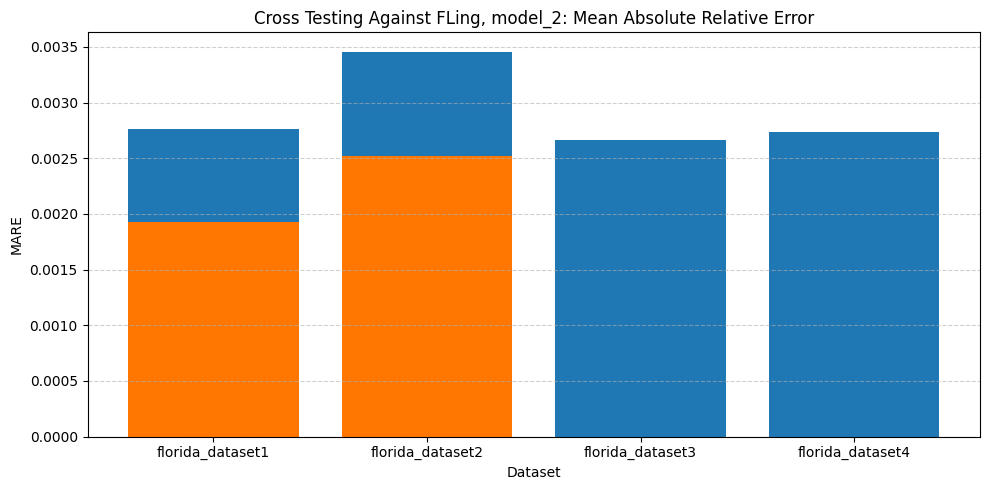

In [10]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_2')

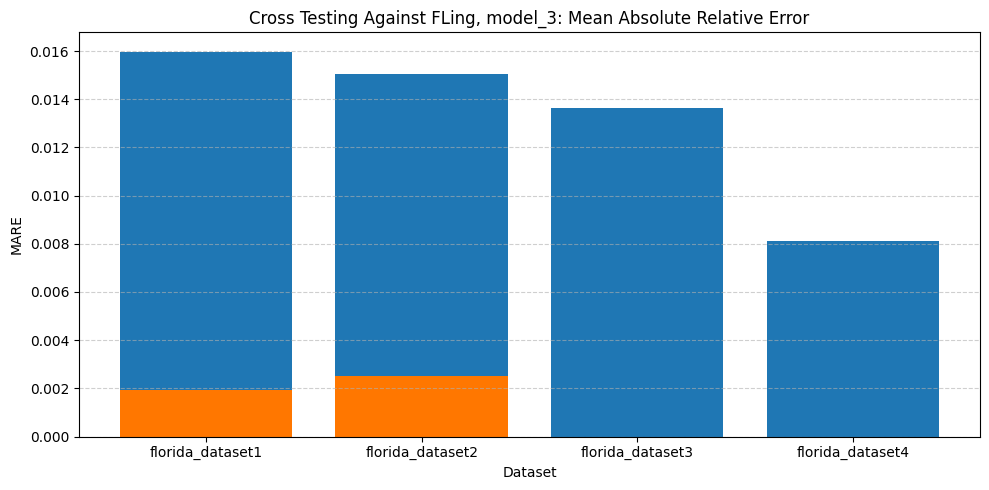

In [11]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_3')

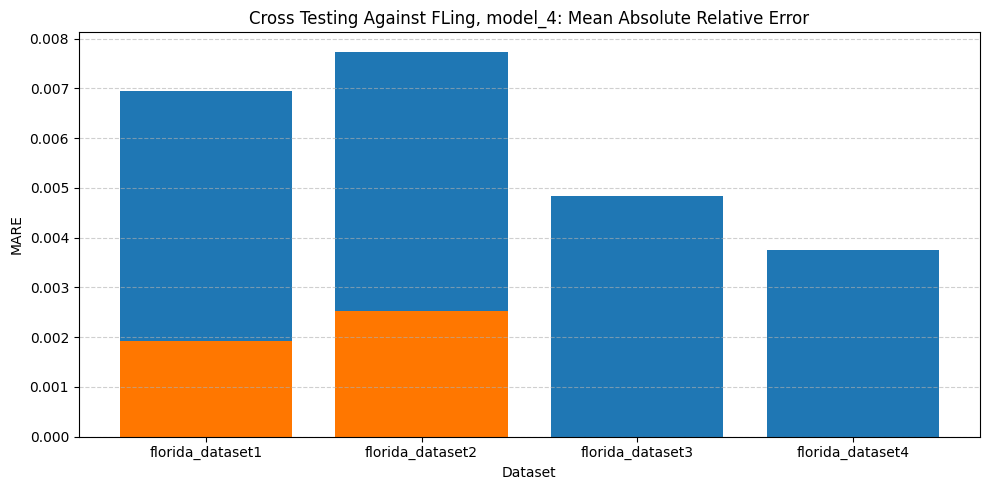

In [12]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_4')

In [13]:
import numpy as np

def plot_FL_TL(file1, file2, learning_type):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    x = np.arange(len(df1['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(x - offset/2, df1['mean'], color='#1f77b4', label='TL')
    plt.bar(x + offset/2, df2['mean'], color="#ff8000", label='FL')
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

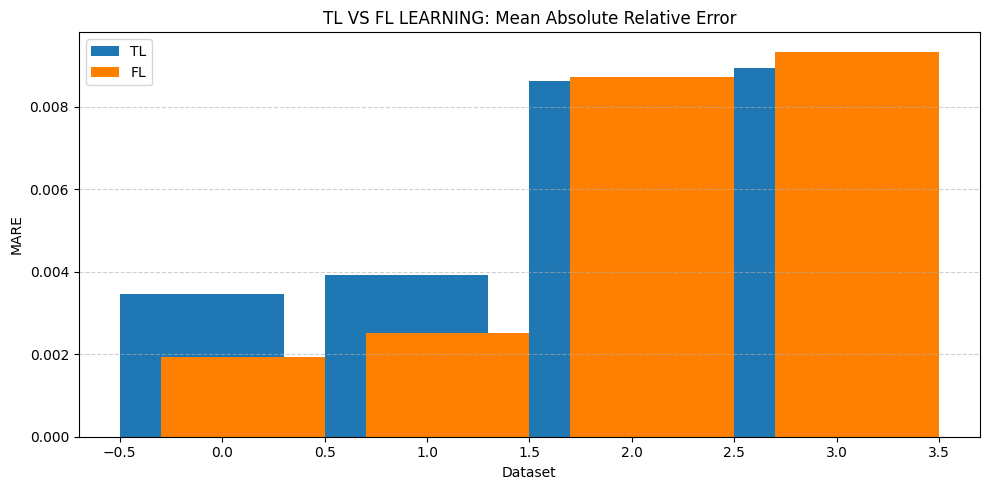

In [14]:
plot_FL_TL(TL_filepath, FL_filepath, learning_type='TL VS FL')